In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install docxtpl
!pip install docx2pdf

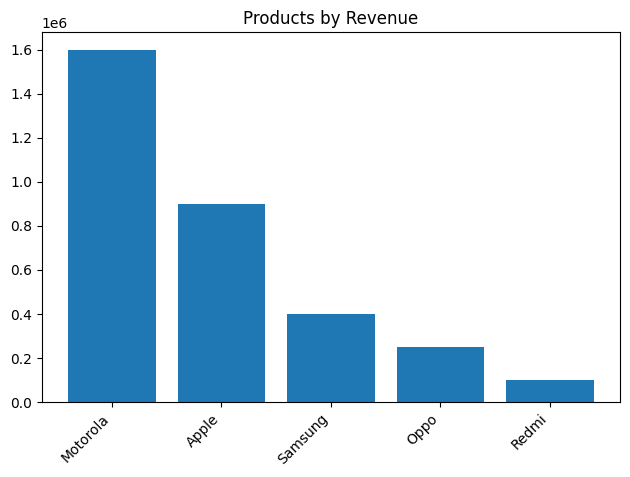

In [ ]:
from docxtpl import DocxTemplate, InlineImage
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt



def generate_sales_report(sales_file_path, output_file_path):
    # Load your dataset
    df = pd.read_excel(sales_file_path)

    # Calculate revenue based on unit price and number of units sold
    df['Revenue'] = df['Price per unit'] * df['Units Sold']

    # Sort the dataset by revenue and select the top 10 items
    salesRows = df.sort_values(by='Revenue', ascending=False).head(10).reset_index(drop=True)

    # Extract the names of the top 3 items
    topItems = salesRows['Product'].head(3).tolist()

    # Create a bar chart for the sales trend
    fig, ax = plt.subplots()
    ax.bar(salesRows['Product'], salesRows['Revenue'])
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.title('Products by Revenue')

    # Save the bar chart as an image
    trendImgPath = "/content/drive/MyDrive/automation_in_python/trendImg.png"
    fig.savefig(trendImgPath)

    # Get the current date
    today = dt.datetime.now().strftime("%d-%b-%Y")

    # Load the report template
    doc = DocxTemplate("/content/drive/MyDrive/automation_in_python/reportTmpl.docx")

    # Create an empty list to store the data for the sales table
    salesTblRows = []

    # Iterate over the rows of the DataFrame
    for index, row in df.iterrows():
        # Extract the relevant information for each row
        sNo = index + 1
        name = row['Product']
        cPu = row['Price per unit']
        nUnits = row['Units Sold']
        revenue = row['Revenue']

        # Append a dictionary containing the extracted information to the salesTblRows list
        salesTblRows.append({"sNo": sNo, "name": name, "cPu": cPu, "nUnits": nUnits, "revenue": revenue})

    # Define the context for the report template
    context = {
        "reportDtStr": today,
        "salesTblRows": salesTblRows,
        "topItemsRows": topItems,
        "trendImg": InlineImage(doc, "/content/drive/MyDrive/automation_in_python/trendImg.png")
    }

    # Render the document with the context
    doc.render(context)

    # Save the rendered document
    doc.save(output_file_path)

#test
generate_sales_report("/content/drive/MyDrive/automation_in_python/data.xlsx",
                      "/content/drive/MyDrive/automation_in_python/report.docx")